In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df['PRICE'] = boston.target
print('Size of boston data set: ', boston_df.shape)
boston_df.head()

Size of boston data set:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


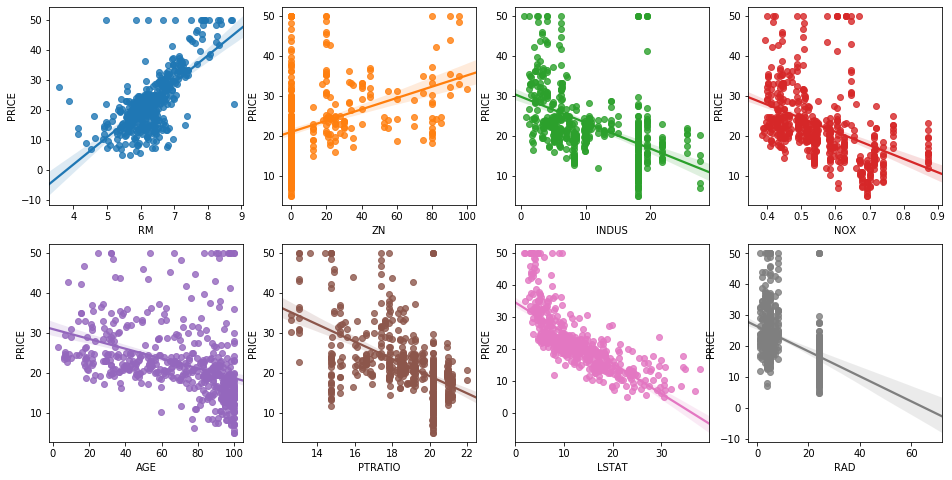

In [7]:
# 각 칼럼이 회귀 결과에 미치는 영향 정도 알아보기
# seaborn의 regplot API 사용
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [19]:
# 위의 그래프를 보면 RM과 LSTAT의 PRICE영향도가 큰것을 알 수 있음
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('MSE: {0:.4f},  RMSE: {1:.4f}'.format(mse, rmse))
print('Variance Score: {0:.4f}'.format(r2_score(y_test, pred)))

MSE: 20.2922,  RMSE: 4.5047
Variance Score: 0.7454


In [24]:
print('intercept value: ', lr.intercept_)
print('regression coefficients: ', np.round(lr.coef_,1))

intercept value:  37.870059783548115
regression coefficients:  [ -0.1   0.    0.    3.7 -17.3   3.7  -0.   -1.6   0.3  -0.   -0.9   0.
  -0.6]


In [26]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.7
CHAS        3.7
RAD         0.3
B           0.0
TAX        -0.0
AGE        -0.0
INDUS       0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.6
NOX       -17.3
dtype: float64

In [29]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('Average RMSE of 5 folds: ', avg_rmse)

Average RMSE of 5 folds:  5.828658946215808
